In [1]:
from imports import *

In [2]:
galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Load files
hdu_muse_f555w  = get_hdu(rootdir, 'muse/%s*_%s_*F555W.fits' %(galaxy_muse.upper(), instrument_f555w.upper()))
hdu_muse_f65Xn  = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()))
hdu_muse_f814w  = get_hdu(rootdir, 'muse/%s*_%s_*F814W.fits' %(galaxy_muse.upper(), instrument_f814w.upper()))
hdu_muse_stars  = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb    = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse        = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')

hdu_hst_f555w   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*_exp_drc_sci.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/%s*_%s_*%s*_exp_drc_sci.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814w   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*_exp_drc_sci.fits' %(galaxy, instrument_f814w))

hdu_hst_f555winv   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*_err_drc_wht.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xninv   = get_hdu(rootdir, 'hst/%s*_%s_*%s*_err_drc_wht.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814winv   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*_err_drc_wht.fits' %(galaxy, instrument_f814w))

# Get resolution 
hst_res  = 0.07 * u.arcsec
_, file_muse_f65Xn = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()), return_filename=True)
muse_res = np.float32(file_muse_f65Xn.split('asec')[0].split('-')[-1]) * u.arcsec

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

# Cosmic ray thresholds
cr_threshold = 0.25
cr_dilation_iterations = 1

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_ACS_F555W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_ACS_F658N.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_ACS_F814W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst/ngc628c_acs_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst/ngc628c_acs_f658n_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst/ngc628c_acs_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_h

In [3]:
do_main = False
if do_main: 
    
    # Make paths
    make_paths(rootdir)
    remove_paths(rootdir)

    # Load errors 
    hdu_hst_f555werr = conv_inverse_variance_to_error(hdu_hst_f555winv)
    hdu_hst_f65Xnerr = conv_inverse_variance_to_error(hdu_hst_f65Xninv)
    hdu_hst_f814werr = conv_inverse_variance_to_error(hdu_hst_f814winv)

    # Convert units 
    hdu_hst_f555w = get_nanzeros(hdu_hst_f555w)
    hdu_hst_f65Xn = get_nanzeros(hdu_hst_f65Xn)
    hdu_hst_f814w = get_nanzeros(hdu_hst_f814w)

    hdu_hst_f65Xn = remove_nan_padding(hdu_hst_f65Xn)
    hdu_hst_f555w = get_regrid(hdu_hst_f555w, hdu_hst_f65Xn)
    hdu_hst_f814w = get_regrid(hdu_hst_f814w, hdu_hst_f65Xn)
    hdu_hst_f65Xnerr = get_regrid(hdu_hst_f65Xnerr, hdu_hst_f65Xn)
    hdu_hst_f555werr = get_regrid(hdu_hst_f555werr, hdu_hst_f65Xn)
    hdu_hst_f814werr = get_regrid(hdu_hst_f814werr, hdu_hst_f65Xn)

    hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w = get_covmask(hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w)

    hdu_hst_f555w = get_electrons_2_ergcm2sA(hdu_hst_f555w)
    hdu_hst_f65Xn = get_electrons_2_ergcm2sA(hdu_hst_f65Xn)
    hdu_hst_f814w = get_electrons_2_ergcm2sA(hdu_hst_f814w)

    hdu_hst_f555werr = get_electrons_2_ergcm2sA(hdu_hst_f555werr, hdu_hst_f555w.header['PHOTFLAM'])
    hdu_hst_f65Xnerr = get_electrons_2_ergcm2sA(hdu_hst_f65Xnerr, hdu_hst_f65Xn.header['PHOTFLAM'])
    hdu_hst_f814werr = get_electrons_2_ergcm2sA(hdu_hst_f814werr, hdu_hst_f814w.header['PHOTFLAM'])

    hdu_muse_f555w = get_Jy_2_ergcm2sA(hdu_muse_f555w, bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'])
    hdu_muse_f65Xn = get_Jy_2_ergcm2sA(hdu_muse_f65Xn, bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'])
    hdu_muse_f814w = get_Jy_2_ergcm2sA(hdu_muse_f814w, bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

    # Smooth and regrid to MUSE
    hdu_hst_f555w_sm = get_smooth(hdu_hst_f555w, hst_res, muse_res)
    hdu_hst_f65Xn_sm = get_smooth(hdu_hst_f65Xn, hst_res, muse_res)
    hdu_hst_f814w_sm = get_smooth(hdu_hst_f814w, hst_res, muse_res)

    hdu_hst_f555w_smre = get_regrid(hdu_hst_f555w_sm, hdu_muse_f555w)
    hdu_hst_f65Xn_smre = get_regrid(hdu_hst_f65Xn_sm, hdu_muse_f65Xn)
    hdu_hst_f814w_smre = get_regrid(hdu_hst_f814w_sm, hdu_muse_f814w)

    # Anchor filter flux density to MUSE
    hdu_hst_f555w_an, hdu_hst_f555w_smrean, fit_f555w = get_anchoring_offset(hdu_muse_f555w, hdu_hst_f555w_smre, hdu_hst_f555w, hdu_muse_stars, 'f555w', rootdir)
    hdu_hst_f65Xn_an, hdu_hst_f65Xn_smrean, fit_f65Xn = get_anchoring_offset(hdu_muse_f65Xn, hdu_hst_f65Xn_smre, hdu_hst_f65Xn, hdu_muse_stars, narrowband_filter, rootdir)
    hdu_hst_f814w_an, hdu_hst_f814w_smrean, fit_f814w = get_anchoring_offset(hdu_muse_f814w, hdu_hst_f814w_smre, hdu_hst_f814w, hdu_muse_stars, 'f814w', rootdir)

    # Make check plots
    make_plots_diff(hdu_hst_f555w_smrean, hdu_muse_f555w, hdu_muse_stars, fit_f555w, 'f555w', rootdir)
    make_plots_diff(hdu_hst_f65Xn_smrean, hdu_muse_f65Xn, hdu_muse_stars, fit_f65Xn, narrowband_filter, rootdir)
    make_plots_diff(hdu_hst_f814w_smrean, hdu_muse_f814w, hdu_muse_stars, fit_f814w, 'f814w', rootdir)

    # Continuum subtract 
    output_hst = get_contsub_err(hdu_hst_f65Xn.copy(), 
                                    hdu_hst_f555w.copy(), 
                                    hdu_hst_f814w.copy(), 
                                    hdu_hst_f65Xnerr.copy(),
                                    hdu_hst_f555werr.copy(),
                                    hdu_hst_f814werr.copy(),
                                    bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                    bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                    bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])
    (hdu_hst_halpha, hdu_hst_cont), (hdu_hst_halpha_err, hdu_hst_cont_err) = output_hst

    output_hst_an = get_contsub_err(hdu_hst_f65Xn_an.copy(), 
                                    hdu_hst_f555w_an.copy(), 
                                    hdu_hst_f814w_an.copy(), 
                                    hdu_hst_f65Xnerr.copy(),
                                    hdu_hst_f555werr.copy(),
                                    hdu_hst_f814werr.copy(),
                                    bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                    bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                    bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])       
    (hdu_hst_an_halpha, hdu_hst_an_cont), (hdu_hst_an_halpha_err, hdu_hst_an_cont_err) = output_hst_an

    output_muse = get_contsub(hdu_muse_f65Xn.copy(), 
                                hdu_muse_f555w.copy(), 
                                hdu_muse_f814w.copy(), 
                                bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
                                bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
                                bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])  
    hdu_muse_halpha, hdu_muse_cont = output_muse


    # Convert units
    photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']

    hdu_hst_halpha        = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha, photbw)
    hdu_hst_halpha_err    = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha_err, photbw)
    hdu_hst_cont          = get_ergcm2sA_2_ergcm2s(hdu_hst_cont, photbw)
    hdu_hst_cont_err      = get_ergcm2sA_2_ergcm2s(hdu_hst_cont_err, photbw)
    hdu_hst_an_halpha     = get_ergcm2sA_2_ergcm2s(hdu_hst_an_halpha, photbw)
    hdu_hst_an_halpha_err = get_ergcm2sA_2_ergcm2s(hdu_hst_an_halpha_err, photbw)
    hdu_hst_an_cont       = get_ergcm2sA_2_ergcm2s(hdu_hst_an_cont, photbw)
    hdu_hst_an_cont_err   = get_ergcm2sA_2_ergcm2s(hdu_hst_an_cont_err, photbw)
    hdu_muse_halpha       = get_ergcm2sA_2_ergcm2s(hdu_muse_halpha, photbw)
    hdu_muse_cont         = get_ergcm2sA_2_ergcm2s(hdu_muse_cont, photbw)
    hdu_hst_f65Xn_anf     = get_ergcm2sA_2_ergcm2s(hdu_hst_f65Xn_an, photbw)

    # Make check plots
    make_plots_muse_comp(hdu_muse_halpha, hdu_muse['HA6562_FLUX'], True, rootdir)
    make_plots_muse_comp(hdu_muse_halpha, hdu_muse['HA6562_FLUX'], False, rootdir)
    make_plots_hst_comp(hdu_hst_an_halpha, hdu_hst_halpha, True, rootdir)
    make_plots_hst_comp(hdu_hst_an_halpha, hdu_hst_halpha, False, rootdir)

    # Anchor Ha flux to MUSE
    hdu_hst_halpha_scaled, hdu_muse_halpha_scaled, fit_halpha = get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_muse_halpha, hdu_hst_halpha, hdu_muse_neb, 'halpha_neb', rootdir, make_plots=False)
    hdu_hst_an_halpha_scaled, hdu_muse_an_halpha_scaled, fit_an_halpha = get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_muse_halpha, hdu_hst_an_halpha, hdu_muse_neb, 'halpha_an_neb', rootdir)

    # Correct errors
    slope_an_halpha = float(fit_an_halpha['slope_bins'].value[0])
    hdu_hst_halpha_err_scaled = hdu_hst_halpha_err.copy() 
    hdu_hst_an_halpha_err_scaled = hdu_hst_an_halpha_err.copy()
    hdu_hst_an_halpha_err_scaled.data = hdu_hst_an_halpha_err_scaled.data * slope_an_halpha

    # Save fits to table 
    save_fittables_offsets(fit_f555w, fit_f65Xn, fit_f814w, rootdir)
    save_fittables_slope(fit_halpha, fit_an_halpha, rootdir)

    # Make check plots
    hdu_hst_an_halpha_scaled_sm = get_smooth(hdu_hst_an_halpha_scaled, hst_res, muse_res)
    hdu_hst_an_halpha_scaled_smre = get_regrid(hdu_hst_an_halpha_scaled_sm, hdu_muse_f555w)
    make_plots_fluxsubmasks(hdu_muse['HA6562_FLUX'], hdu_hst_an_halpha_scaled_smre, hdu_muse_neb, 'halpha_an_scaled_neb', rootdir)
    get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_hst_an_halpha_scaled_smre, hdu_hst_halpha, hdu_muse_neb, 'halpha_an_scaled_neb', rootdir)

    # Make check plots histo
    hdu_muse_neb_re = get_regrid(hdu_muse_neb, hdu_hst_an_halpha_scaled, conserve_flux=False, order='nearest-neighbor')
    hdu_muse_stars_re = get_regrid(hdu_muse_stars, hdu_hst_an_halpha_scaled, conserve_flux=False, order='nearest-neighbor')
    make_plots_histogram(hdu_hst_an_halpha_scaled, hdu_muse_neb_re, hdu_muse_stars_re, 'hdu_hst_an_halpha_scaled', rootdir)

    # Make maps plots
    make_plots_map(hdu_hst_an_halpha_scaled, galaxy, 'hst_ha', rootdir)

    # Save files
    write_hdu(hdu_hst_f555w_smre, rootdir, '%s_hst_f555w_smre.fits' %galaxy)
    write_hdu(hdu_hst_f65Xn_smre, rootdir, '%s_hst_%s_smre.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_f814w_smre, rootdir, '%s_hst_f814w_smre.fits' %galaxy)

    write_hdu(hdu_hst_f555w, rootdir, '%s_hst_f555w.fits' %galaxy)
    write_hdu(hdu_hst_f65Xn, rootdir, '%s_hst_%s.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_f814w, rootdir, '%s_hst_f814w.fits' %galaxy)

    write_hdu(hdu_muse_f555w, rootdir, '%s_muse_f555w.fits' %galaxy)
    write_hdu(hdu_muse_f65Xn, rootdir, '%s_muse_%s.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_muse_f814w, rootdir, '%s_muse_f814w.fits' %galaxy)

    write_hdu(hdu_hst_f555w_an, rootdir, '%s_hst_f555w_an.fits' %galaxy)
    write_hdu(hdu_hst_f65Xn_an, rootdir, '%s_hst_%s_an.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_f814w_an, rootdir, '%s_hst_f814w_an.fits' %galaxy)

    write_hdu(hdu_muse_halpha, rootdir, '%s_muse_%s_contsub.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_an_halpha, rootdir, '%s_hst_%s_an_contsub.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_halpha, rootdir, '%s_hst_%s_contsub.fits' %(galaxy, narrowband_filter))

    write_hdu(hdu_muse_cont, rootdir, '%s_muse_%s_cont.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_an_cont, rootdir, '%s_hst_%s_an_cont.fits' %(galaxy, narrowband_filter))
    write_hdu(hdu_hst_cont, rootdir, '%s_hst_%s_cont.fits' %(galaxy, narrowband_filter))

    write_hdu(hdu_muse['HA6562_FLUX'], rootdir, '%s_muse_ha.fits' %galaxy)

    write_hdu(hdu_hst_an_halpha_scaled, rootdir, '%s_hst_ha.fits' %galaxy)
    write_hdu(hdu_hst_an_halpha_err_scaled, rootdir, '%s_hst_ha_err.fits' %galaxy)                

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c//hst_contsub/ngc628c_hst_ha.fits
[INFO] Reprojecting the input image to match the template WCS...
[INFO] Performing image reprojection...
[INFO] Image reprojection complete.
[INFO] Reprojection process completed.
[INFO] Negative values processed
[INFO] [deepCR] Running deepCR...
[INFO] [deepCR] Running with patch=1024
[INFO] [deepCR] Dilation of deepCR mask...
[INFO] [deepCR] Interpolated deepCR mask...


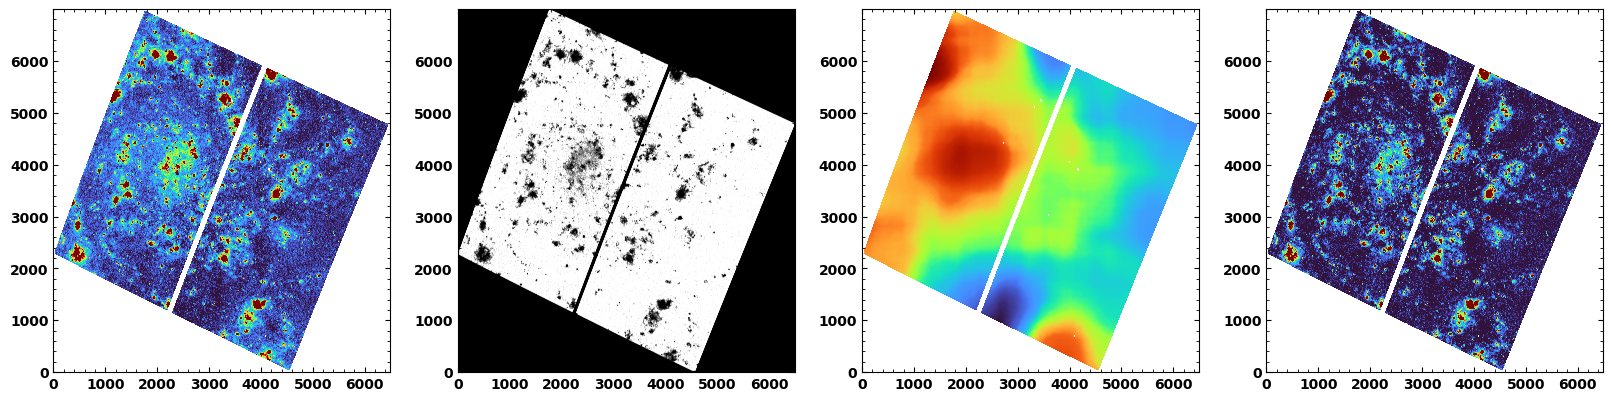

In [4]:
do_post = True
if do_post: 

    # Copy image... 
    hdu_hst_an_halpha_scaled = get_hdu(rootdir, '/hst_contsub/%s_hst_ha.fits' %galaxy) 
    hdu_hst_ha = hdu_hst_an_halpha_scaled.copy()

    # Coverage mask
    hdu_mask = get_mask(hdu_hst_ha)

    # Remove backgroundsub
    hdu_hst_ha_b = get_bgsub(hdu_hst_an_halpha_scaled, box_size=(50, 50), filter_size=(25, 25), plot=True)

    # Remove stars
    hdu_muse_stars_r = get_regrid(hdu_muse_stars, hdu_hst_ha, conserve_flux=False, order='nearest-neighbor')
    # hdu_hst_ha_s = get_mask_stars(hdu_hst_ha, hdu_muse_stars_r, hdu_mask)
    hdu_hst_ha_bs = get_mask_stars(hdu_hst_ha_b, hdu_muse_stars_r, hdu_mask)

    # Interpolate negatives
    # hdu_hst_ha_i = get_interp_negs(hdu_hst_ha, hdu_mask)
    # hdu_hst_ha_si = get_interp_negs(hdu_hst_ha_s, hdu_mask)
    # hdu_hst_ha_bi = get_interp_negs(hdu_hst_ha_b, hdu_mask)
    hdu_hst_ha_bsi = get_interp_negs(hdu_hst_ha_bs, hdu_mask)

    # Remove cosmic rays
    # hdu_hst_ha_c = get_cosmicrays(hdu_hst_ha, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
    # hdu_hst_ha_ic = get_cosmicrays(hdu_hst_ha_i, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
    # hdu_hst_ha_sic = get_cosmicrays(hdu_hst_ha_si, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
    # hdu_hst_ha_bc = get_cosmicrays(hdu_hst_ha_b, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
    # hdu_hst_ha_bic = get_cosmicrays(hdu_hst_ha_bi, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)
    hdu_hst_ha_bsic = get_cosmicrays(hdu_hst_ha_bsi, hdu_mask, threshold=cr_threshold, dilation_iterations=cr_dilation_iterations)

    # Save files
    # hdu_hst_ha_s.writeto(rootdir+'hst_contsub/%s_hst_ha_s.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_si.writeto(rootdir+'hst_contsub/%s_hst_ha_si.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_sic.writeto(rootdir+'hst_contsub/%s_hst_ha_sic.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_i.writeto(rootdir+'hst_contsub/%s_hst_ha_i.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_ic.writeto(rootdir+'hst_contsub/%s_hst_ha_ic.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_b.writeto(rootdir+'hst_contsub/%s_hst_ha_b.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_bc.writeto(rootdir+'hst_contsub/%s_hst_ha_bc.fits' %galaxy, overwrite=True)
    # hdu_hst_ha_bic.writeto(rootdir+'hst_contsub/%s_hst_ha_bic.fits' %galaxy, overwrite=True)
    hdu_hst_ha_bsic.writeto(rootdir+'hst_contsub/%s_hst_ha_bsic.fits' %galaxy, overwrite=True)